# Q-LEARNING

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mc_model_evaluation as mc_q
import logging

In [2]:
folder_mode = True              # If loading should be done from seperate folder
folder_name = "gcp_MEGA_run"   # The name of the folder

save_mode = False                # If plots should be shown or saved

# Arguments of the trained agents
args = mc_q.get_args_from_txt(folder_name)

# Remaining arguments
n_test = 1e3
n_runs = 8
n_train = 4e4

file_names = mc_q.args_to_file_names(args, n_runs = n_runs, n = n_train)

Q_mean, Q_tables = mc_q.calculate_mean_Q(file_names, folder_mode=folder_mode, folder_name=folder_name)

In [3]:
# Q-LEARNING MEAN

env = mc_q.MonteCarloEnv(**args, debug=False)

Q_tab = Q_mean

Q_t = []
X_t = []
V_t = []

for episode in range(int(n_test)):

    env.reset()

    q_t = [0]
    x_t = [0]
    v_t = [0]

    while env.t < env.T:        
        state = env.state()

        action = np.unravel_index(Q_tab[state].argmax(), Q_tab[state].shape)

        action = mc_q.tuple_action_to_dict(action)

        env.step(action)

        q_t.append(env.Q_t)
        x_t.append(env.X_t)
        v_t.append(env.X_t + env.H_t)

    Q_t.append(q_t)
    X_t.append(x_t)
    V_t.append(v_t)

Q_t_Q_mean = np.mean(Q_t, axis=0)
X_t_Q_mean = np.mean(X_t, axis=0)
V_t_Q_mean = np.mean(V_t, axis=0)

# Q-LEARNING BEST RUN

env = mc_q.MonteCarloEnv(**args, debug=False)

best_idx = 0

Q_tab = Q_tables[best_idx]

Q_t = []
X_t = []
V_t = []

for episode in range(int(n_test)):

    env.reset()

    q_t = [0]
    x_t = [0]
    v_t = [0]

    while env.t < env.T:        
        state = env.state()

        action = np.unravel_index(Q_tab[state].argmax(), Q_tab[state].shape)

        action = mc_q.tuple_action_to_dict(action)

        env.step(action)

        q_t.append(env.Q_t)
        x_t.append(env.X_t)
        v_t.append(env.X_t + env.H_t)

    Q_t.append(q_t)
    X_t.append(x_t)
    V_t.append(v_t)

Q_t_best = np.mean(Q_t, axis=0)
X_t_best = np.mean(X_t, axis=0)
V_t_best = np.mean(V_t, axis=0)

# DDQN

In [5]:
import mc_model_mm_deep_rl_batch as mc_deep

In [6]:
# CHOOSE FILE

outdir = "results/mc_model_deep/"

folder_name = "binned_rs_001_full_x8"

outdir += folder_name + "/"

randomize_start = True

gpu = -1

# FETCH NEEDED INFO
model_names, estimate_names = mc_deep.load_file_names(outdir)
args, info = mc_deep.load_arguments(outdir)
args["randomize_reset"] = randomize_start     # choose what you want
args["phi"] = 0


# LOAD THE AGENTS
agents = []
env_function = mc_deep.get_env_function()
vec_env = mc_deep.setup_batch_env(args, env_function, num_envs=info["num_envs"])
print("Environment setup")
for model_name in model_names:
    print("\tLoading:", model_name)
    agents.append(mc_deep.load_agent(mc_deep.setup_ddqn_agent(vec_env, info, gpu), model_name))


Environment setup
	Loading: results/mc_model_deep/binned_rs_001_full_x8/model_folder/10000000_finish_1
	Loading: results/mc_model_deep/binned_rs_001_full_x8/model_folder/10000000_finish_2
	Loading: results/mc_model_deep/binned_rs_001_full_x8/model_folder/10000000_finish_3
	Loading: results/mc_model_deep/binned_rs_001_full_x8/model_folder/10000000_finish_4
	Loading: results/mc_model_deep/binned_rs_001_full_x8/model_folder/10000000_finish_5
	Loading: results/mc_model_deep/binned_rs_001_full_x8/model_folder/10000000_finish_6
	Loading: results/mc_model_deep/binned_rs_001_full_x8/model_folder/10000000_finish_7
	Loading: results/mc_model_deep/binned_rs_001_full_x8/model_folder/10000000_finish_8


In [7]:
# DDQN MEAN STRATEGY

Q_t, X_t, V_t = mc_deep.sample_strategies_mean(agents, env_function, args, info, n_test)

Q_t_mean_DDQN = np.mean(Q_t, axis=0)
X_t_mean_DDQN = np.mean(X_t, axis=0)
V_t_mean_DDQN = np.mean(V_t, axis=0)

# DDQN BEST RUN

best_idx = 5

Q_t, X_t, V_t = mc_deep.sample_strategies(agents[best_idx], env_function, args, info, n_test)

Q_t_best_DDQN = np.mean(Q_t, axis=0)
X_t_best_DDQN = np.mean(X_t, axis=0)
V_t_best_DDQN = np.mean(V_t, axis=0)

vec_env.close()

# BENCHMARKS

In [4]:
# CONSTANT

env = mc_q.MonteCarloEnv(**args, debug=False)

c = 1

Q_t = []
X_t = []
V_t = []

for episode in range(int(n_test)):

    env.reset()

    q_t = [0]
    x_t = [0]
    v_t = [0]

    while env.t < env.T:
        state = env.state()

        action = mc_q.tuple_action_to_dict((c, c, 0))

        env.step(action)

        q_t.append(env.Q_t)
        x_t.append(env.X_t)
        v_t.append(env.X_t + env.H_t)

    Q_t.append(q_t)
    X_t.append(x_t)
    V_t.append(v_t)

Q_t_constant = np.mean(Q_t, axis=0)
X_t_constant = np.mean(X_t, axis=0)
V_t_constant = np.mean(V_t, axis=0)

# RANDOM

env = mc_q.MonteCarloEnv(**args, debug=False)

Q_t = []
X_t = []
V_t = []

for episode in range(int(n_test)):

    env.reset()

    q_t = [0]
    x_t = [0]
    v_t = [0]

    while env.t < env.T:
        state = env.state()

        action = env.action_space.sample()

        env.step(action)

        q_t.append(env.Q_t)
        x_t.append(env.X_t)
        v_t.append(env.X_t + env.H_t)

    Q_t.append(q_t)
    X_t.append(x_t)
    V_t.append(v_t)

Q_t_random = np.mean(Q_t, axis=0)
X_t_random = np.mean(X_t, axis=0)
V_t_random = np.mean(V_t, axis=0)

# PLOTTING

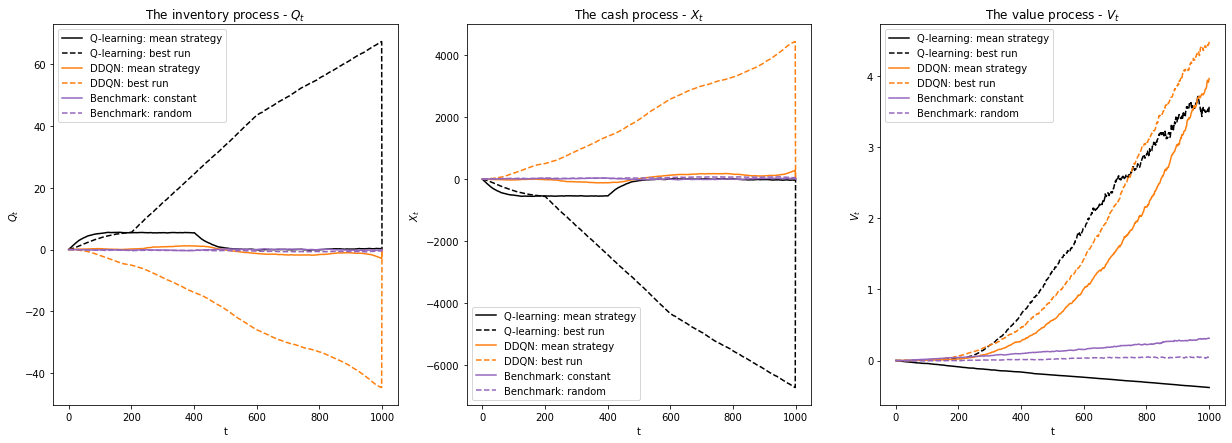

In [8]:
fig, (q_axis, x_axis, v_axis) = plt.subplots(1, 3, figsize=(21, 7))

q_axis.plot(Q_t_Q_mean, linestyle="-", color="k", label="Q-learning: mean strategy")
x_axis.plot(X_t_Q_mean / 100, linestyle="-", color="k", label="Q-learning: mean strategy")
v_axis.plot(V_t_Q_mean / 100, linestyle="-", color="k", label="Q-learning: mean strategy")

q_axis.plot(Q_t_best, linestyle="--", color="k", label="Q-learning: best run")
x_axis.plot(X_t_best / 100, linestyle="--", color="k", label="Q-learning: best run")
v_axis.plot(V_t_best / 100, linestyle="--", color="k", label="Q-learning: best run")

q_axis.plot(Q_t_mean_DDQN, linestyle="-", color="C1", label="DDQN: mean strategy")
x_axis.plot(X_t_mean_DDQN / 100, linestyle="-", color="C1", label="DDQN: mean strategy")
v_axis.plot(V_t_mean_DDQN / 100, linestyle="-", color="C1", label="DDQN: mean strategy")

q_axis.plot(Q_t_best_DDQN, linestyle="--", color="C1", label="DDQN: best run")
x_axis.plot(X_t_best_DDQN / 100, linestyle="--", color="C1", label="DDQN: best run")
v_axis.plot(V_t_best_DDQN / 100, linestyle="--", color="C1", label="DDQN: best run")

q_axis.plot(Q_t_constant, linestyle="-", color="C4", label="Benchmark: constant")
x_axis.plot(X_t_constant / 100, linestyle="-", color="C4", label="Benchmark: constant")
v_axis.plot(V_t_constant / 100, linestyle="-", color="C4", label="Benchmark: constant")

q_axis.plot(Q_t_random, linestyle="--", color="C4", label="Benchmark: random")
x_axis.plot(X_t_random / 100, linestyle="--", color="C4", label="Benchmark: random")
v_axis.plot(V_t_random / 100, linestyle="--", color="C4", label="Benchmark: random")

q_axis.set_title("The inventory process - $Q_t$")
x_axis.set_title("The cash process - $X_t$")
v_axis.set_title("The value process - $V_t$")

q_axis.set_xlabel("t")
q_axis.set_ylabel("$Q_t$")
q_axis.get_yaxis().get_major_formatter().set_useOffset(False)

x_axis.set_xlabel("t")
x_axis.set_ylabel("$X_t$")
x_axis.get_yaxis().get_major_formatter().set_useOffset(False)

v_axis.set_xlabel("t")
v_axis.set_ylabel("$V_t$")
v_axis.get_yaxis().get_major_formatter().set_useOffset(False)

q_axis.legend()
x_axis.legend()
v_axis.legend()

plt.show()